In [53]:
import pickle
pickle_in = open(("/Users/ivowings/Sync/Thesis/Code/Convd Test/bert_sequence_x.pickle"),"rb")
x = pickle.load(pickle_in)

pickle_in = open(("/Users/ivowings/Sync/Thesis/Code/Convd Test/bert_sequence_y.pickle"),"rb")
y_complete = pickle.load(pickle_in)
y =y_complete[['label']]

In [55]:
bert_token_1 = ['bert_embedding_token_1_'+ str(index) for index in range(0,768)]
bert_token_2 = ['bert_embedding_token_2_'+ str(index) for index in range(0,768)]
bert_token_3 = ['bert_embedding_token_3_'+ str(index) for index in range(0,768)]
bert_token_4 = ['bert_embedding_token_4_'+ str(index) for index in range(0,768)]

separator_1 = ['separator_1']
separator_2 = ['separator_2']
separator_3 = ['separator_3']

tags_columns = list(x.columns[(3131-56):3131])

column_names = bert_token_1 + separator_1 + bert_token_2 + separator_2 + bert_token_3 + separator_3 + bert_token_4 + tags_columns

x.columns = column_names

In [56]:
x = x.drop(columns=['separator_1','separator_2','separator_3'])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=10000000000000000000000,random_state=456, n_jobs=-1)
lr.fit(X_train,y_train.values.ravel())


LogisticRegression(max_iter=10000000000000000000000, n_jobs=-1,
                   random_state=456)

In [59]:
test = X_test.join(y_test)
not_skill = test[test.label==0].sample(30,random_state=456)
soft_skill = test[test.label==1].sample(30,random_state=456)
hard_skill = test[test.label==2].sample(30,random_state=456)

In [60]:
import pandas as pd
X_test = pd.concat([not_skill,soft_skill,hard_skill])
X_test = X_test.drop(columns=['label'])
y_test = pd.concat([not_skill,soft_skill,hard_skill])
y_test = y_test[['label']]

In [61]:
import shap
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.to_numpy() # we need to pass a dense version for the plotting functions

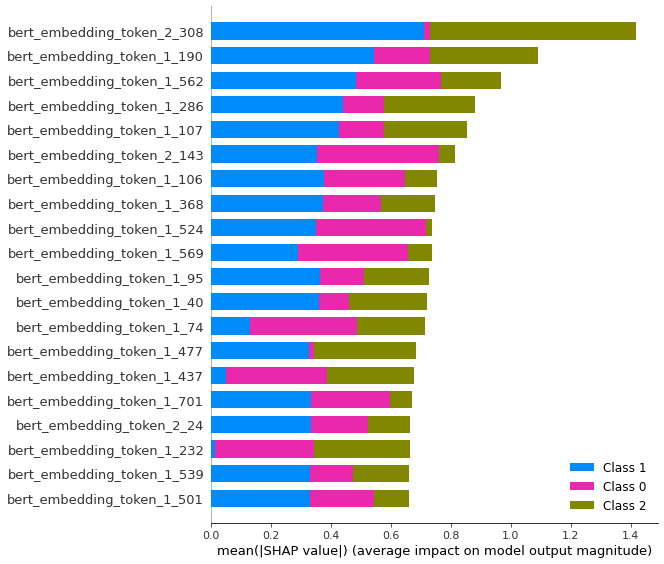

In [62]:
shap.summary_plot(shap_values, X_test)


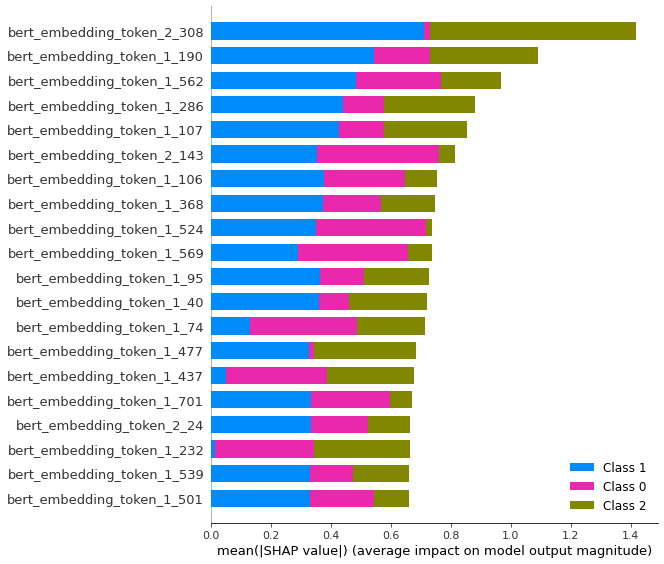

In [63]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("Seq_SHAP_BERT.eps", format='eps',bbox_inches='tight')